<h2>Introduction to programming and data visualisation</h2>

Dataset 2 (link: https://osf.io/n752f/ or, on Blackboard, dataProblem2.xlsx)

Your company was asked to devise a machine learning model to determine how accurately it is possible to identify dyslexic individuals based on a small publicly available dataset. 

- Task 4 (15 points out of 100): Study the dataset. Note that you are free to search for the documentation of that data and even the related paper. Visualise the data. What appear to be the most promising features?
- Task 5 (20 points out of 100): Fit a binary classifier and quantify its accuracy. Visualise the classification results as we discussed in the lectures and tutorials. In addition, add a short description in plain English (e.g., by using the Python comments) to each numerical result, explaining what that value represents and what can be concluded from the analysis. Use the model to determine the most important features, which could be used as diagnostic markers.


Note: Remember that there may be many answers! You will be evaluated based on both your code and your understanding of the problem. Be curious! What would you tell to your manager? Can the dataset be improved? How?

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

<h4>Task 4</h4>

In [3]:
# TODO
URL = "/Users/yana/Documents/01_TRINITY/02_Machine Learning/01_Homework01/dataProblem2.xlsx"
dataset = pd.read_excel(URL)
dataset.head()

,Dyslexia,TTO,TRO,TNO,RTO,RRO,RNO,NTO,NRO,NNO,TTS,TRS,TNS,RTS,RRS,RNS,NTS,NRS,NNS
0,y,13,3,8,2,15,7,6,6,12,5,12,7,7,11,6,8,12,4
1,y,16,4,4,1,12,11,0,14,10,15,7,2,2,14,8,1,8,15
2,y,15,4,5,3,8,13,4,1,19,12,2,10,7,9,8,0,4,20
3,y,12,6,6,2,11,11,0,6,18,14,5,5,1,12,11,1,7,16
4,y,17,4,3,4,9,11,3,5,16,18,2,4,2,15,7,2,9,13


/Users/yana/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yana/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yana/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yana/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

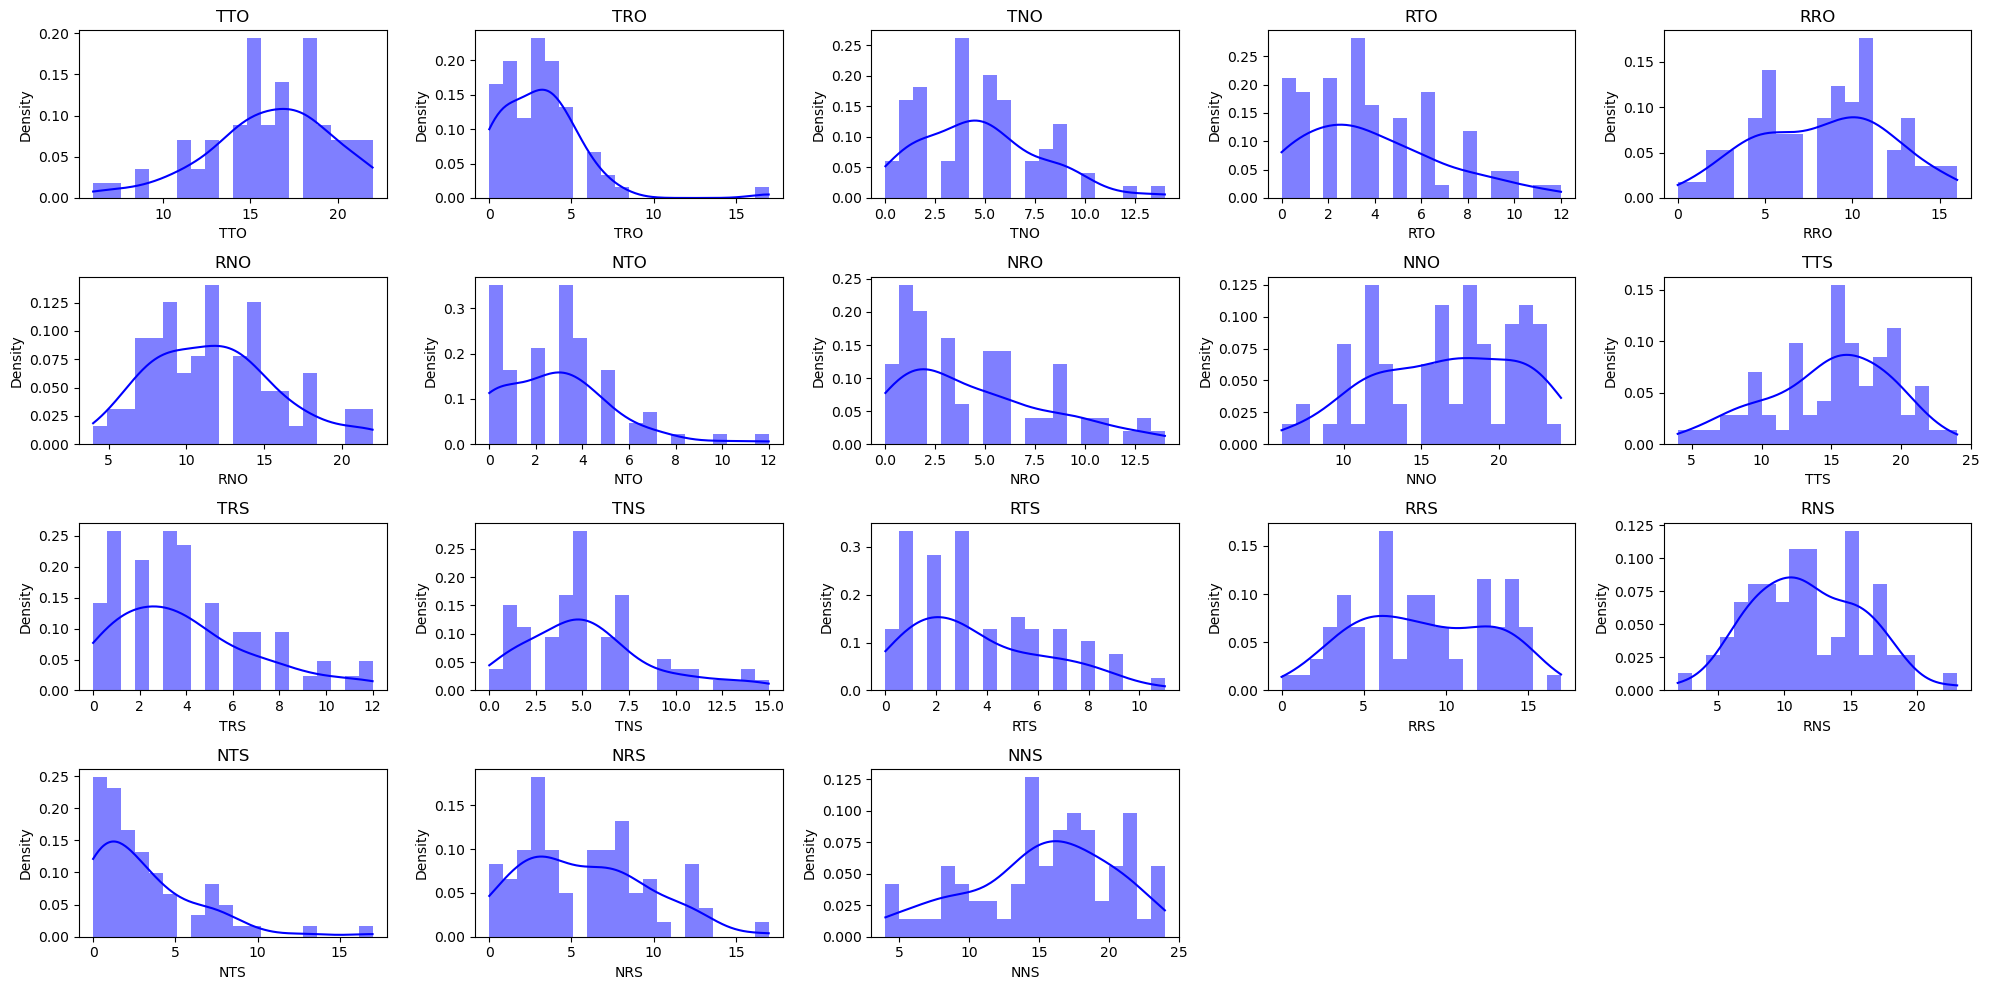

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converting 'Dyslexia' from 'y'/'n' to 1/0 for easier analysis
dataset['Dyslexia'] = dataset['Dyslexia'].map({'y': 1, 'n': 0})

# Visualising the distribution of the data for each feature to identify promising features
plt.figure(figsize=(20, 10))
for i, column in enumerate(dataset.columns[1:], 1):
    plt.subplot(4, 5, i)
    sns.histplot(dataset[column], kde=True, bins=20, color='blue', stat="density", linewidth=0)
    plt.title(column)

plt.tight_layout()
plt.show()

In [5]:
# Conclusion Task4

# The dataset2 consists of several features with abbreviations and a target variable Dyslexia indicating whether 
# an individual is dyslexic (y) or not. The features denoted by combinations of three letters* 
# (e.g., TTO, TRO, TNO, etc.), with a total of 18 features. 
# Each row in the dataset represents an individual's performance across these tasks.

# The visualisations provide insights into how the features distribute between individuals identified as 
# dyslexic (y) and those who are not, across the various tasks or assessments represented by the features.

# Looking at the visualisations I can guess that the most promising features might be: 
# TTO, RRO, RNS, TTS, RNO, NNS.


# *The documentation of that dataset and the related paper had been found here:
# https://onlinelibrary.wiley.com/doi/epdf/10.1002/dys.1655

<h4>Task 5</h4>

In [6]:
# TODO

# Preparing the data
# Features
X = dataset.drop('Dyslexia', axis=1)
# Dataset for classification
y = dataset['Dyslexia']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Features
# Looking at the dataset
X_train

,TTO,TRO,TNO,RTO,RRO,RNO,NTO,NRO,NNO,TTS,TRS,TNS,RTS,RRS,RNS,NTS,NRS,NNS
30,21,1,2,0,16,8,0,3,21,18,1,5,0,12,12,0,0,24
59,13,2,9,4,5,15,3,2,19,16,3,5,1,11,12,1,2,21
35,19,1,4,1,5,18,1,0,23,14,3,7,1,6,17,1,0,23
58,20,2,2,6,9,9,4,6,14,19,5,0,6,8,10,6,8,10
42,21,1,2,7,13,4,5,1,18,11,7,6,2,10,12,1,13,10
16,17,2,5,5,3,16,3,5,16,21,2,1,9,4,11,7,3,14
34,15,4,5,6,13,5,7,5,12,20,3,1,0,14,10,0,1,23
44,20,3,1,9,7,8,5,6,13,16,4,4,3,8,13,5,10,9
28,15,4,5,0,3,21,0,2,22,9,1,14,3,3,18,4,2,18
7,17,3,4,6,8,10,3,5,16,16,2,6,9,5,10,5,5,14


In [8]:
# Looking at y_train
y_train # 1 - "y", 0 - "n"

30    1
59    0
35    0
58    0
42    0
16    1
34    0
44    0
28    1
7     1
54    0
50    0
45    0
47    0
19    1
57    0
40    0
25    1
39    0
13    1
70    0
3     1
17    1
38    0
8     1
56    0
6     1
36    0
65    0
63    0
69    0
15    1
27    1
41    0
26    1
48    0
24    1
68    0
64    0
11    1
32    0
67    0
62    0
37    0
29    1
43    0
66    0
1     1
52    0
21    1
2     1
23    1
20    1
60    0
14    1
51    0
Name: Dyslexia, dtype: int64

In [9]:
type(X_train)

pandas.core.frame.DataFrame

In [10]:
# Printing mean and std for each feature (i.e., column)
print("Mean:")
print(X_train.mean(axis=0))
print("\nStd:")
print(X_train.std(axis=0))
print("\nValue type:")
print(X_train.dtypes)

Mean:
TTO    16.107143
TRO     2.767857
TNO     5.125000
RTO     3.964286
RRO     8.446429
RNO    11.589286
NTO     2.732143
NRO     4.535714
NNO    16.732143
TTS    15.071429
TRS     3.482143
TNS     5.446429
RTS     3.696429
RRS     8.357143
RNS    11.946429
NTS     2.875000
NRS     5.660714
NNS    15.464286
dtype: float64

Std:
TTO    3.606452
TRO    2.018019
TNO    2.960728
RTO    3.207742
RRO    3.692349
RNO    4.080004
NTO    2.203230
NRO    3.692569
NNO    4.676794
TTS    4.177242
TRS    2.396900
TNS    3.541544
RTS    2.696258
RRS    4.029115
RNS    4.006448
NTS    3.213961
NRS    3.881316
NNS    5.023451
dtype: float64

Value type:
TTO    int64
TRO    int64
TNO    int64
RTO    int64
RRO    int64
RNO    int64
NTO    int64
NRO    int64
NNO    int64
TTS    int64
TRS    int64
TNS    int64
RTS    int64
RRS    int64
RNS    int64
NTS    int64
NRS    int64
NNS    int64
dtype: object


In [11]:
# Putting them all in one table
type(X_train.mean(axis=0)) # Each result (mean, std, type) is a
                           # vector of type pandas.core.series.Series
    
descriptiveStats=pd.concat([X_train.mean(axis=0),X_train.std(axis=0),X_train.dtypes],axis=1)

descriptiveStats.columns = ['Mean', 'Std', 'Type']
descriptiveStats

,Mean,Std,Type
TTO,16.107143,3.606452,int64
TRO,2.767857,2.018019,int64
TNO,5.125000,2.960728,int64
RTO,3.964286,3.207742,int64
RRO,8.446429,3.692349,int64
RNO,11.589286,4.080004,int64
NTO,2.732143,2.203230,int64
NRO,4.535714,3.692569,int64
NNO,16.732143,4.676794,int64
TTS,15.071429,4.177242,int64


In [12]:
from sklearn.feature_selection import VarianceThreshold
from itertools import compress

In [13]:
# 5a. 'VarianceThreshold' method, that removes all features whose variance are smaller than the threshold
# As we can guess those would probably not bring useful information.

# Fitting the features 'Selector'
sel = VarianceThreshold(threshold=0.1)
sel.fit(X_train)

# Getting the selected features names
selected_features = list(compress(list(X),sel.get_support()))
print('Selected features: ', selected_features)

# Same feature selection on training and test set
X_train_tf = sel.transform(X_train)
X_test_tf = sel.transform(X_test)

Selected features:  ['TTO', 'TRO', 'TNO', 'RTO', 'RRO', 'RNO', 'NTO', 'NRO', 'NNO', 'TTS', 'TRS', 'TNS', 'RTS', 'RRS', 'RNS', 'NTS', 'NRS', 'NNS']


In [14]:
sel

VarianceThreshold(threshold=0.1)

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif

In [16]:
# 5b.Selecting the features with the best scores

sel2 = SelectKBest(f_classif, k=5) # Calculates ANOVA F-value between label/feature for classification tasks
                                   # and selects the k features with highest score
sel2.fit(X_train_tf, y_train)

# Get the selected features names
selected_features2 = list(compress(selected_features,sel2.get_support()))
print('Selected features: ', selected_features2)

# Same feature selection on training and test set
X_train_tf2 = sel2.transform(X_train_tf)
X_test_tf2 = sel2.transform(X_test_tf)

Selected features:  ['TTO', 'TRO', 'RRO', 'TRS', 'TNS']


<Axes: >

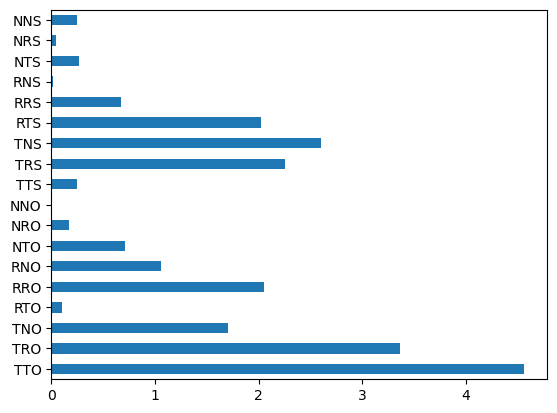

In [17]:
#Visualisation
F_score, p_score = f_classif(X_train_tf,y_train)
features_importance = pd.Series(F_score, selected_features)
features_importance.plot(kind= 'barh')

In [18]:
# Fitting the classifier to our 'training' dataset
clf = DecisionTreeClassifier(max_depth=100) 
# Fitting the classifier to our 'training' dataset
clf.fit(X_train_tf2, y_train)

# Predicting new values based on the train dataset AND the test dataset
predicted_y_train = clf.predict(X_train_tf2)
predicted_y_test = clf.predict(X_test_tf2)

# Evaluating
#Score: Correctly classified over total number of points
train_score = clf.score(X_train_tf2, y_train)
test_score = clf.score(X_test_tf2, y_test)

print('Training set score: ', train_score, '|Testing set score: ', test_score)

Training set score:  1.0 |Testing set score:  0.8


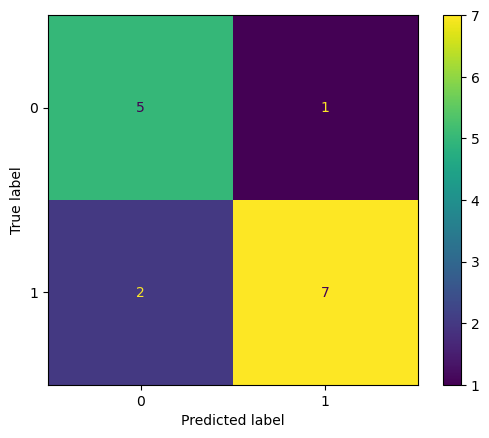

In [19]:
# Confusion matrix:
ConfusionMatrixDisplay.from_estimator(clf, X_test_tf2, y_test)
plt.show()

In [20]:
# Conclusion Task5

# Initially, a feature selector was applied to remove features with low variance (less than 0.1). 
# This step (5a) assumes that features with low variance do not contribute significantly to the model's 
# ability to classify new instances.


# A second feature selection process (5b) using ANOVA F-value was applied to select the 5 best features that have 
# the highest correlation with the target variable, assuming that these are the most informative for the 
# classification task.
# The five features selected after applying SelectKBest are: ['TTO', 'TRO', 'RRO', 'TRS', 'TNS']. 
# These features are considered the most relevant for distinguishing between dyslexic and non-dyslexic 
# individuals according to the ANOVA F-test.


# A decision tree classifier was trained using the top five features. The classifier achieved a perfect score 
# on the training set: 1.0, which indicates that it was able to perfectly classify the training data.
# The classifier obtained a score of 0.8 on the test set, meaning it correctly classified 80% of the 
# unseen data. This is a strong result but suggests some overfitting to the training data since the training 
# score was 1.0.

# In the confusion matrix, the main diagonal (top-left to bottom-right) shows the number of correct predictions, 
# while the other cells show the instances that were misclassified.


# The decision tree classifier could be a useful tool for identifying dyslexic individuals, with selected 
# features showing potential as diagnostic markers. The perfect training score and lower testing score 
# suggest the model might be overfitting, so further tuning or regularisation might be needed to make the 
# model generalise better.
# The selected features ['TTO', 'TRO', 'RRO', 'TRS', 'TNS'] should be further investigated to understand 
# their specific role in dyslexia diagnosis.



# Can the dataset be improved? How?
# The following improvements could be considered:
# 1. The 'Dyslexia' variable uses 'y' and 'n' to indicate presence or absence. Converting this into a numerical 
# format, such as 1 for 'y' and 0 for 'n', that I've done.
# 2. Creating new features that might be relevant to effectively predict dyslexia presence. 
# For example, calculating the total scores across certain tasks or creating ratios to compare different types 
# of scores.